In [ ]:
! pip install pytube -q
!pip install yt-dlp
!pip install pydub
!apt install ffmpeg
!pip install torch
!pip install torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
from pytube import YouTube

In [ ]:
# VIDEO_URL = 'https://www.youtube.com/watch?v=0CmtDk-joT4&t=7s'

In [ ]:
VIDEO_URL = 'https://www.youtube.com/watch?v=tTZWvPYNJ1A'
yt = YouTube(VIDEO_URL)

In [ ]:
import yt_dlp

In [ ]:
def download_audio(video_url, output_path="short_video"):
    try:
        ydl_opts = {
            'format': 'bestaudio/best',
            'outtmpl': output_path,
            'postprocessors': [{
                'key': 'FFmpegExtractAudio',
                'preferredcodec': 'mp3',
                'preferredquality': '192',
            }],
            'nocheckcertificate': True,  # This skips SSL certificate verification
        }
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            ydl.download([video_url])
        print("Audio downloaded successfully!")
    except Exception as e:
        print("Error during video download:", e)

download_audio("https://www.youtube.com/watch?v=tTZWvPYNJ1A")


[youtube] Extracting URL: https://www.youtube.com/watch?v=tTZWvPYNJ1A
[youtube] tTZWvPYNJ1A: Downloading webpage
[youtube] tTZWvPYNJ1A: Downloading ios player API JSON
[youtube] tTZWvPYNJ1A: Downloading mweb player API JSON
[youtube] tTZWvPYNJ1A: Downloading player 89dfc5b3
[youtube] tTZWvPYNJ1A: Downloading m3u8 information
[info] tTZWvPYNJ1A: Downloading 1 format(s): 251
[download] Destination: short_video
[download] 100% of    3.07MiB in 00:00:00 at 8.11MiB/s   
[ExtractAudio] Destination: short_video.mp3
Deleting original file short_video (pass -k to keep)
Audio downloaded successfully!


Audio Cleaning


In [ ]:
from pydub import AudioSegment
from pydub.silence import detect_nonsilent

# Load audio file
audio = AudioSegment.from_file("short_video.mp3")

# Detect and retain only nonsilent parts
nonsilent_intervals = detect_nonsilent(audio, min_silence_len=1000, silence_thresh=-40)
clean_audio = sum([audio[start:end] for start, end in nonsilent_intervals])

# Save cleaned audio
clean_audio.export("cleaned_audio.mp3", format="mp3")


<_io.BufferedRandom name='cleaned_audio.mp3'>

In [ ]:
! ffmpeg -i cleaned_audio.mp3 -acodec pcm_s16le -ar 16000 ytaudio1.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from transformers import pipeline

# Make sure to specify the device as 0 to use the GPU
whisper_model = pipeline(
    "automatic-speech-recognition",
    model="openai/whisper-small",
    device=0  # Set this to 0 to use the first available GPU
)

result = whisper_model("ytaudio1.wav",return_timestamps=True)
transcript = result['text']
print(transcript)

with open('transcript1.txt', 'w') as f:
    f.write(transcript)

print("Transcript saved to transcript1.txt")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


 Here's how you can create professional looking business videos in just minutes using InVideo. First, you're going to write a script so you have a blueprint, a clear goal of what your video is going to convey. Second, you're going to use that script and import it into InVideo so InVideo generates an automatic storyboard that then you're going to edit. There's two other options, create a video from a template or start from scratch. From my experience, writing the script first and then letting InVideo convert that into of a storyboard is the most efficient way of creating a video. Then you're going to choose an aspect ratio and a template. The aspect ratio is gonna be the square, horizontal and vertical and the template is just gonna be the overall look of your video. Which then you're going to edit by adding stock footage and images. In video has a large database of both free and paid stock footage and images to enhance your video but you can always upload your own. Fifth, you're going 

Cleaning for Transcript

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords

# Define file paths
input_file = "transcript1.txt"
output_file = "cleaned_transcript.txt"

# Load transcript from the input file
with open(input_file, "r") as file:
    transcript = file.read()

# Remove filler words, special characters, and stopwords
stop_words = set(stopwords.words('english'))
cleaned_transcript = " ".join(
    word for word in re.sub(r'[^\w\s]', '', transcript).split()
    if word.lower() not in stop_words
)

# Save the cleaned transcript to the output file
with open(output_file, "w") as file:
    file.write(cleaned_transcript)

print(f"Cleaned transcript has been saved to {output_file}")



Cleaned transcript has been saved to cleaned_transcript.txt


[('video', 14), ('going', 10), ('youre', 9), ('want', 6), ('script', 5), ('InVideo', 4), ('edit', 4), ('upload', 4), ('create', 3), ('template', 3)]


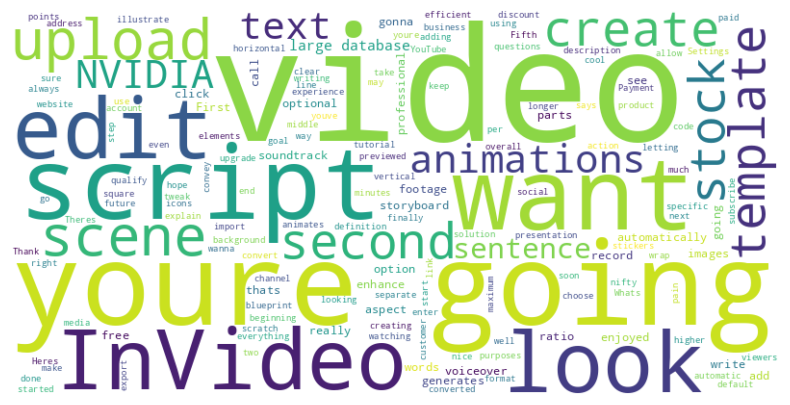

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Example: Word frequency analysis
word_list = cleaned_transcript.split()
word_freq = Counter(word_list)
print(word_freq.most_common(10))  # Top 10 words

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_transcript)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from textblob import TextBlob

# Calculate sentiment
blob = TextBlob(transcript)
sentiment = blob.sentiment

# Display sentiment scores
print(f"Polarity (sentiment scale): {sentiment.polarity}")
print(f"Subjectivity (opinion scale): {sentiment.subjectivity}")


Polarity (sentiment scale): 0.2457473544973545
Subjectivity (opinion scale): 0.46838844797178136


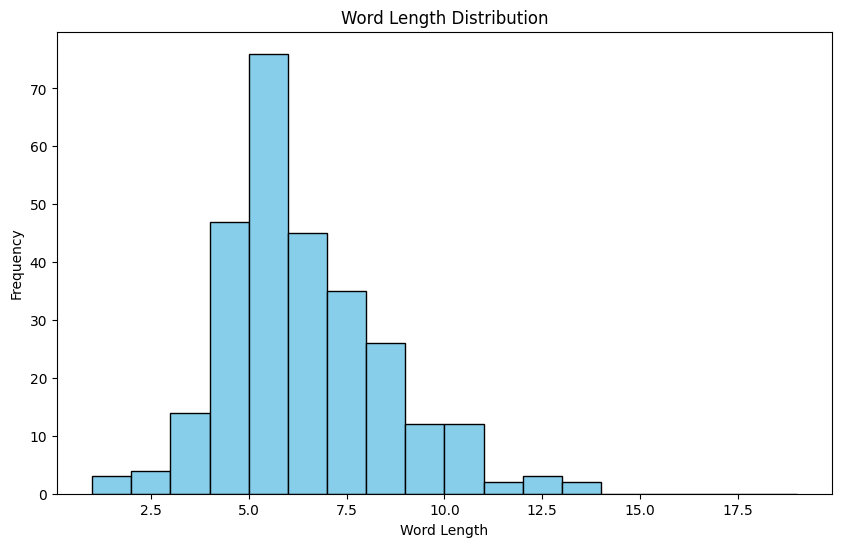

In [ ]:
import matplotlib.pyplot as plt

# Word length analysis
word_lengths = [len(word) for word in cleaned_transcript.split()]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=range(1, 20), edgecolor='black', color='skyblue')
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Part-of-Speech Analysis:
NNS: 31
VBP: 19
JJ: 56
VBG: 18
NN: 91
NNP: 16
VBZ: 3
CD: 8
VB: 7
RB: 17
VBD: 5
MD: 1
IN: 4
VBN: 3
JJR: 1
RBR: 1


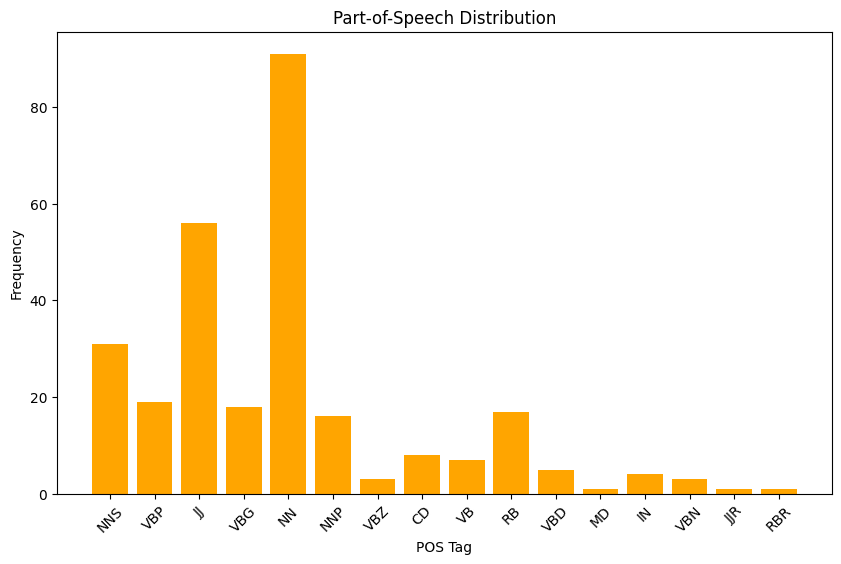

In [ ]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('averaged_perceptron_tagger_eng') # Download the correct data package

# Perform POS tagging
words = cleaned_transcript.split()
pos_tags = nltk.pos_tag(words)

# Count POS occurrences
pos_counts = Counter(tag for _, tag in pos_tags)

# Display POS counts
print("Part-of-Speech Analysis:")
for tag, count in pos_counts.items():
    print(f"{tag}: {count}")

# Plot POS counts
plt.figure(figsize=(10, 6))
plt.bar(pos_counts.keys(), pos_counts.values(), color='orange')
plt.title('Part-of-Speech Distribution')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from nltk.util import ngrams
from collections import Counter

# Generate bigrams
bigrams = list(ngrams(cleaned_transcript.split(), 2))
bigram_counts = Counter(bigrams)

# Display top 10 bigrams
print("Top 10 Bigrams:")
for bigram, count in bigram_counts.most_common(10):
    print(f"{bigram}: {count}")


Top 10 Bigrams:
('youre', 'going'): 8
('going', 'edit'): 3
('large', 'database'): 3
('write', 'script'): 2
('video', 'youre'): 2
('aspect', 'ratio'): 2
('stock', 'footage'): 2
('footage', 'images'): 2
('video', 'large'): 2
('text', 'animations'): 2


SUMMARIZING TRANSCRIPT USING MULTIPLE MODELS


using bart

In [ ]:
from transformers import pipeline

# Initialize the summarizer pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Read the original summary from the file
with open("transcript1.txt", "r") as file:
    original_summary = file.read()

# Generate the summarized text
short_summary = summarizer(original_summary, max_length=150, min_length=60, do_sample=False)

# Extract the summary text
summary_text = short_summary[0]['summary_text']

# Write the summary text to a new file
with open("bart_summary.txt", "w") as output_file:
    output_file.write(summary_text)

print(short_summary[0]['summary_text'])
print("Summary saved to 'short_summary_using_bart.txt'.")



config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Here's how you can create professional looking business videos in just minutes using InVideo. InVideo generates an automatic storyboard that then you're going to edit. In video has a large database of both free and paid stock footage and images to enhance your video but you can always upload your own. NVIDIA animates all your scenes automatically, but you may want to tweak them for your own purposes.
Summary saved to 'short_summary_using_bart.txt'.


using peagus

In [ ]:

from transformers import PegasusForConditionalGeneration, PegasusTokenizer

# Load the PEGASUS tokenizer and model
model_name = "google/pegasus-cnn_dailymail"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

# Read input text from a .txt file
with open("transcript1.txt", "r") as file:
    original_text = file.read()

# Tokenize the input text
inputs = tokenizer(original_text, max_length=150, truncation=True, return_tensors="pt")

# Generate summary
summary_ids = model.generate(inputs["input_ids"], max_length=150, min_length=60, length_penalty=2.0, num_beams=4, early_stopping=True)

# Decode the summary
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Write the summary to a .txt file
with open("pegasus_summary.txt", "w") as output_file:
    output_file.write(summary)

print("PEGASUS Summary:", summary)
print("Summary saved to 'pegasus_summary.txt'.")



tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

PEGASUS Summary: How to create professional looking business videos in just minutes using InVideo .<n>Writing a script first and then letting InVideo convert that into of a storyboard is the most efficient way of creating a video .<n>Choose an aspect ratio and a template. The aspect ratio is gonna be the square, horizontal .
Summary saved to 'pegasus_summary.txt'.


using t5

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load the T5 tokenizer and model
model_name = "t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Read input text from a .txt file
with open("transcript1.txt", "r") as file:
    original_text = file.read()

# Prepare the input text (T5 uses a prefix "summarize:")
input_text = "summarize: " + original_text

# Tokenize the input text
inputs = tokenizer(input_text, max_length=150, truncation=True, return_tensors="pt")

# Generate summary
summary_ids = model.generate(inputs["input_ids"], max_length=150, min_length=60, length_penalty=2.0, num_beams=4, early_stopping=True)

# Decode the summary
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Write the summary to a .txt file
with open("t5_summary.txt", "w") as output_file:
    output_file.write(summary)

print("T5 Summary:", summary)

print("Summary saved to 't5_summary.txt'.")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5 Summary: create professional looking business videos in just minutes using InVideo . write a script so you have a blueprint, a clear goal of what your video is going to convey . then import that script into InVideo so InVideo generates an automatic storyboard . you can also create a video from a template or start from scratch .
Summary saved to 't5_summary.txt'.


In [ ]:
pip install openai==0.28

using gpt



In [ ]:


import openai

# Load your OpenAI API key
openai.api_key = "sk-zaSOod11bobKa-UF7XnJTO2uMvXVKc3hLPvcUuacsUT3BlbkFJaKRx7W1m2w67Tr" #Replace with your api key

# Read input text from a .txt file
with open("transcript1.txt", "r") as file:
    original_text = file.read()

# Define the system and user messages
messages = [
    {"role": "system", "content": "You are a creative assistant specializing in designing AI prompts for image generation."},
    {"role": "user", "content": f"Refine the following text into a detailed, descriptive prompt for generating a professional YouTube thumbnail image:\n\n{original_text}"}
]

# Call the OpenAI ChatCompletion API
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",  # Replace with "gpt-4" if accessible
    messages=messages,
    max_tokens=150,
    temperature=0.7
)

# Extract the summary
summary = response['choices'][0]['message']['content'].strip()
print("GPT Summary:", summary)

# Write the summary to a .txt file
with open("gpt_summary.txt", "w") as output_file:
    output_file.write(summary)

print("Summary saved to 'gpt_summary.txt'.")


GPT Summary: Create an eye-catching YouTube thumbnail image for a tutorial on creating professional business videos with InVideo. The thumbnail should feature a sleek, modern design with elements symbolizing video creation, such as a script page, storyboard sketches, aspect ratio options, and video templates. Include vibrant colors to attract attention and convey creativity. Incorporate icons and stickers subtly to represent enhancement tools available in InVideo. Emphasize the simplicity and efficiency of the process by showcasing a seamless flow from scriptwriting to final video export. Consider using a split-screen layout to visually represent the different stages of video production, such as scriptwriting, editing animations, adding stock footage, and choosing soundtracks. Ensure the text on the thumbnail is clear and concise, highlighting key steps like scriptwriting
Summary saved to 'gpt_summary.txt'.


In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT()

with open("transcript1.txt", "r") as file:
    original_summary = file.read()

keywords = kw_model.extract_keywords(original_summary, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=10)

print(keywords)


GENERATING IMAGES USING ABOVE GENERATED SUMMARIES

withoutput from bart








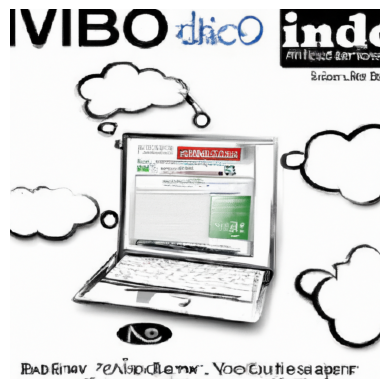

In [ ]:


import openai
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Set up your OpenAI API key
openai.api_key = 'sk-5HlCF30dGKA1PeOt5NfLm044Dqy__juMutMdn1Tw7hT3BlbkFJEEjoKFTDJdJ-nP9dFj9zb3CEI'  # Replace with your actual OpenAI API key

# Read the text prompt from bart_summary.txt
with open("bart_summary.txt", "r") as file:
    prompt = file.read().strip()

# Generate an image using the DALL-E model
def generate_image_from_text(prompt):
    # Use openai.Image.create() to generate an image
    response = openai.Image.create(
        prompt=prompt,  # The text prompt for the image
        n=1,            # Number of images to generate
        size="1024x1024" # Image size
    )

    # Get the URL of the generated image
    image_url = response['data'][0]['url']  # Access the 'url' from the 'data' list

    # Download and display the image
    image_response = requests.get(image_url)
    img = Image.open(BytesIO(image_response.content))

    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.show()

# Call the function to generate and display the image
generate_image_from_text(prompt)



with output from peagus


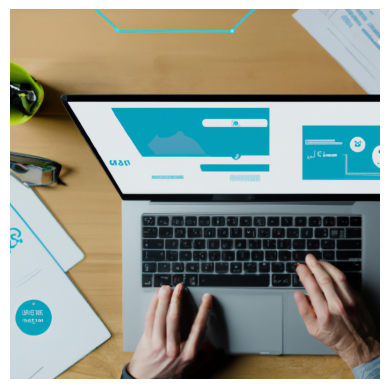

In [ ]:
import openai
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Set up your OpenAI API key
openai.api_key = 'sk-5HlCF30dGKA1PeOt5NfLm044Dqy__juMutMdn1Tw7hT3BlbkFJEEjoKFTDJdJ-nP9dFj9zb3CEd ' # Replace with your actual OpenAI API key

# Define the text prompt
with open("pegasus_summary.txt", "r") as file:
    prompt = file.read().strip()

# Generate an image using the DALL-E model
def generate_image_from_text(prompt):
    # Use openai.Image.create() to generate an image
    response = openai.Image.create(
        prompt=prompt,  # The text prompt for the image
        n=2,            # Number of images to generate
        size="1024x1024" # Image size
    )

    # Get the URL of the generated image
    image_url = response['data'][0]['url']  # Access the 'url' from the 'data' list

    # Download and display the image
    image_response = requests.get(image_url)
    img = Image.open(BytesIO(image_response.content))

    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.show()

# Call the function to generate and display the image
generate_image_from_text(prompt)


with output from t5

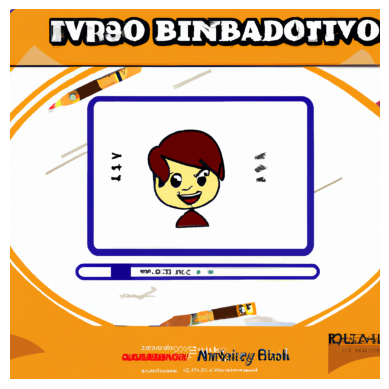

In [ ]:
import openai
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Set up your OpenAI API key
openai.api_key = 'sk-5HlCF30dGKA1PeOt5NfLm044Dqy__juMutMdn1Tw7hT3BlbkFJEEjoKFTDJdJ-nP9dFj9zb3CEdHqg84Ip-W'

with open("t5_summary.txt", "r") as file:
    prompt = file.read().strip()


# Generate an image using the DALL-E model
def generate_image_from_text(prompt):
    # Use openai.Image.create() to generate an image
    response = openai.Image.create(
        prompt=prompt,  # The text prompt for the image
        n=1,            # Number of images to generate
        size="1024x1024" # Image size
    )

    # Get the URL of the generated image
    image_url = response['data'][0]['url']  # Access the 'url' from the 'data' list

    # Download and display the image
    image_response = requests.get(image_url)
    img = Image.open(BytesIO(image_response.content))

    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.show()

# Call the function to generate and display the image
generate_image_from_text(prompt)


from gpt 3.5


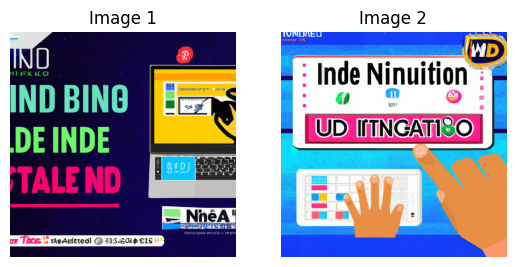

In [ ]:
import openai
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

openai.api_key = 'sk-5HlCF30dGKA1PeOt5NfLm044Dqy__juMutMdn1Tw7hT3BlbkFJEEjoKFTDJdJ-nP9b3C ' #Replace with your api key

# Read the prompt from the file
with open("gpt_summary.txt", "r") as file:
    prompt = file.read().strip()

def generate_images_from_text(prompt, num_images=2):
    # Generate images using the DALL-E model
    response = openai.Image.create(
        prompt=prompt,
        n=num_images,    # Set to generate 2 images
        size="1024x1024"
    )

    for i, image_data in enumerate(response['data']):
        image_url = image_data['url']

        image_response = requests.get(image_url)
        img = Image.open(BytesIO(image_response.content))

        # Display the image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()


generate_images_from_text(prompt, num_images=2)
